In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
path = './input_X_maz/'
file = '469-0-562-60-120_Ch32'
#file = '120deg-10x75'
#file = 'Axxis_Full'
filename = path + file +'.txt'

In [3]:
#f = open(filename)
#lines = f.read().splitlines()
#f.close()
#for i, line in enumerate(lines):
#    if i < 10:
#        print(i, line)

In [4]:
column_names = ['ShotNo', 'StrNo', 'RecNo', 'Offset', 'MidPtX', 'MidPtY', 'DipSrc', 'DipRec', 'AzSrc']

In [5]:
rowstoskip = 2

In [6]:
df_raw = pd.read_csv(filename, names=column_names, usecols=['Offset', 'MidPtX', 'MidPtY', 'AzSrc'], skiprows=rowstoskip, delim_whitespace=True)

In [7]:
len(df_raw)

4443264

In [8]:
mx_min, mx_max = 12000, 13000
my_min, my_max = 12000, 13000

In [9]:
df_filt = df_raw[(df_raw['MidPtX'] >= mx_min) & (df_raw['MidPtY'] >= my_min) & (df_raw['MidPtX'] <= mx_max) & (df_raw['MidPtY'] <= my_max)]

In [10]:
len(df_filt)

175104

In [11]:
df_filt['OffsetY'] = df_filt.apply(lambda row: row.Offset*np.cos(np.deg2rad(row.AzSrc)), axis=1)
df_filt['OffsetX'] = df_filt.apply(lambda row: row.Offset*np.sin(np.deg2rad(row.AzSrc)), axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
#df_filt

In [38]:
binsize_x = 12.5
binsize_y = 12.5
#binsize_x = 37.5
#binsize_y = 25
#x_min, x_max = 9000, 16000
#y_min, y_max = 9000, 16000
x_min, x_max = 12000, 13000
y_min, y_max = 12000, 13000
#xx, yy = np.meshgrid(np.arange(x_min, x_max, binsize_x),np.arange(y_min, y_max, binsize_y))
xx = np.arange(x_min, x_max, binsize_x)
yy = np.arange(y_min, y_max, binsize_y)

offset_binsize = 25
offset_min, offset_max = 0, 500
offset_bin = np.arange(offset_min, offset_max, offset_binsize)

In [39]:
offset_bin

array([  0,  25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300,
       325, 350, 375, 400, 425, 450, 475])

In [40]:
xx.shape

(80,)

In [41]:
ret_fold = stats.binned_statistic_2d(df_filt['MidPtX'], df_filt['MidPtY'], None, 'count', bins=[xx,yy])

In [42]:
#ret.statistic

In [43]:
def fold_plot(data, title, incx, incy, zeroisnan=False):
    if zeroisnan:
        data[data==0] = np.nan
    sns.set_style('dark')
    f, ax = plt.subplots(figsize=(18, 12))
    ax = sns.heatmap(data, cmap='jet')
    ax.invert_yaxis()
    plt.title(title)
    plt.xlabel('Bin East (inc: '+ str(incx)+'m)')
    plt.ylabel('Bin North (inc: '+ str(incy)+'m)');

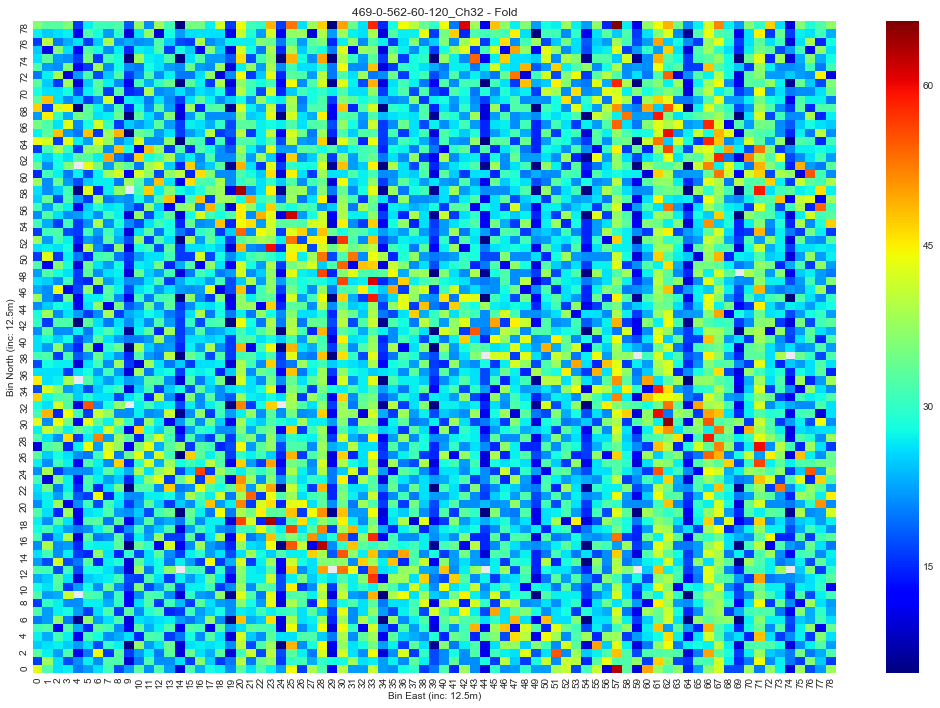

In [44]:
fold_plot(ret_fold.statistic.T, file+' - Fold', binsize_x, binsize_y, zeroisnan=True)

In [45]:
ret_fold.statistic.max()

nan

In [46]:
ret_minoffs = stats.binned_statistic_2d(df_filt['MidPtX'], df_filt['MidPtY'], df_filt['Offset'], statistic='min', bins=[xx,yy])

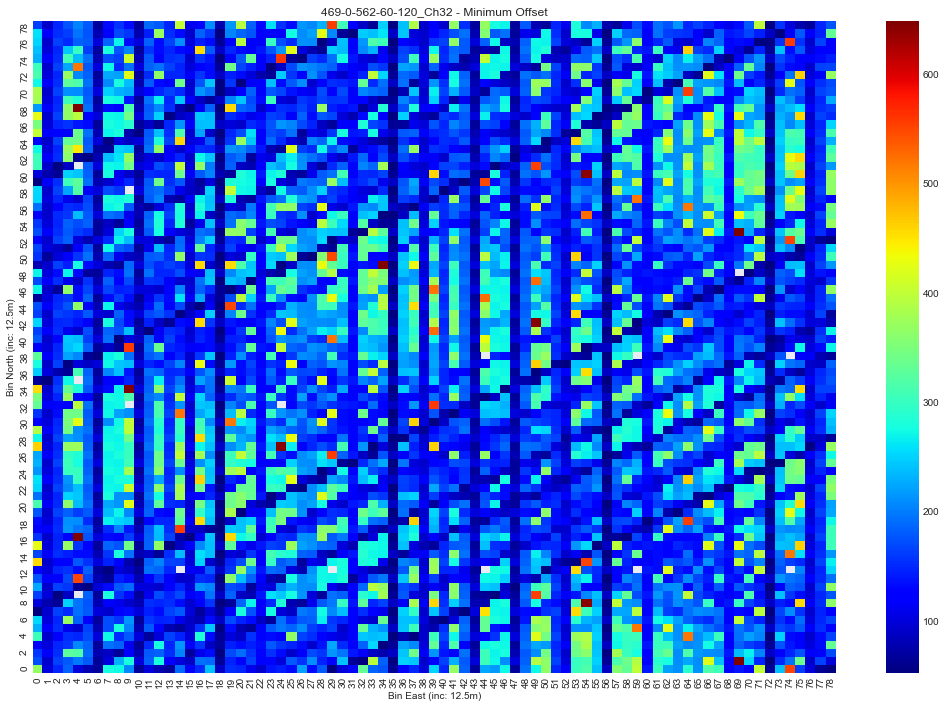

In [47]:
fold_plot(ret_minoffs.statistic.T, file+' - Minimum Offset', binsize_x, binsize_y)

In [48]:
ret_maxoffs = stats.binned_statistic_2d(df_filt['MidPtX'], df_filt['MidPtY'], df_filt['Offset'], statistic='max', bins=[xx,yy])

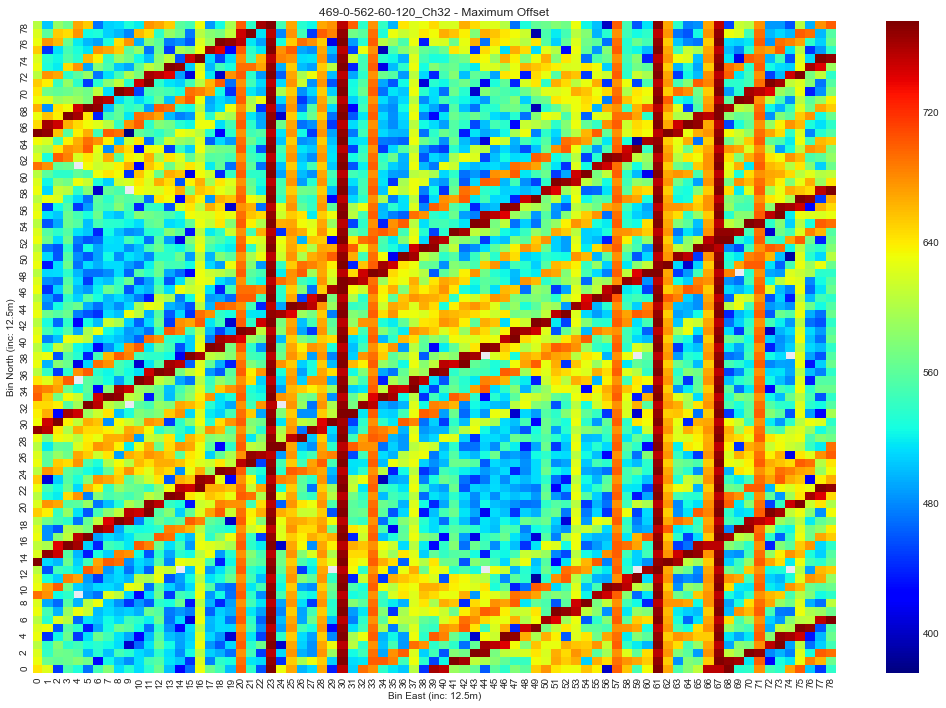

In [49]:
fold_plot(ret_maxoffs.statistic.T, file+' - Maximum Offset', binsize_x, binsize_y)

In [50]:
ret_maxinloffs = stats.binned_statistic_2d(df_filt['MidPtX'], df_filt['MidPtY'], abs(df_filt['OffsetY']), statistic='max', bins=[xx,yy])

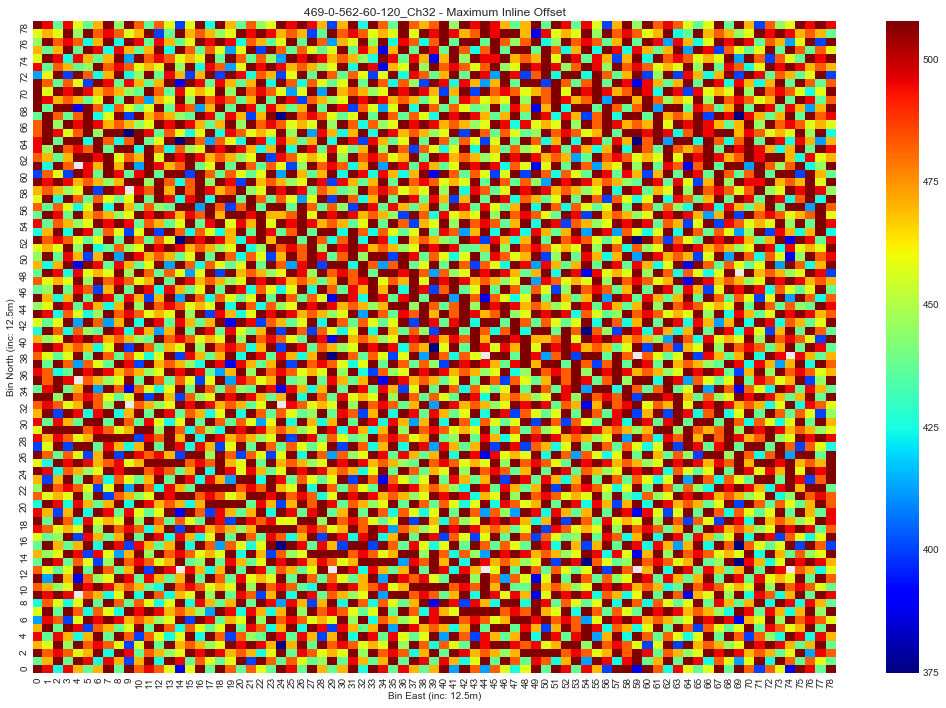

In [51]:
fold_plot(ret_maxinloffs.statistic.T, file+' - Maximum Inline Offset', binsize_x, binsize_y)

In [52]:
ret_mininloffs = stats.binned_statistic_2d(df_filt['MidPtX'], df_filt['MidPtY'], abs(df_filt['OffsetY']), statistic='min', bins=[xx,yy])

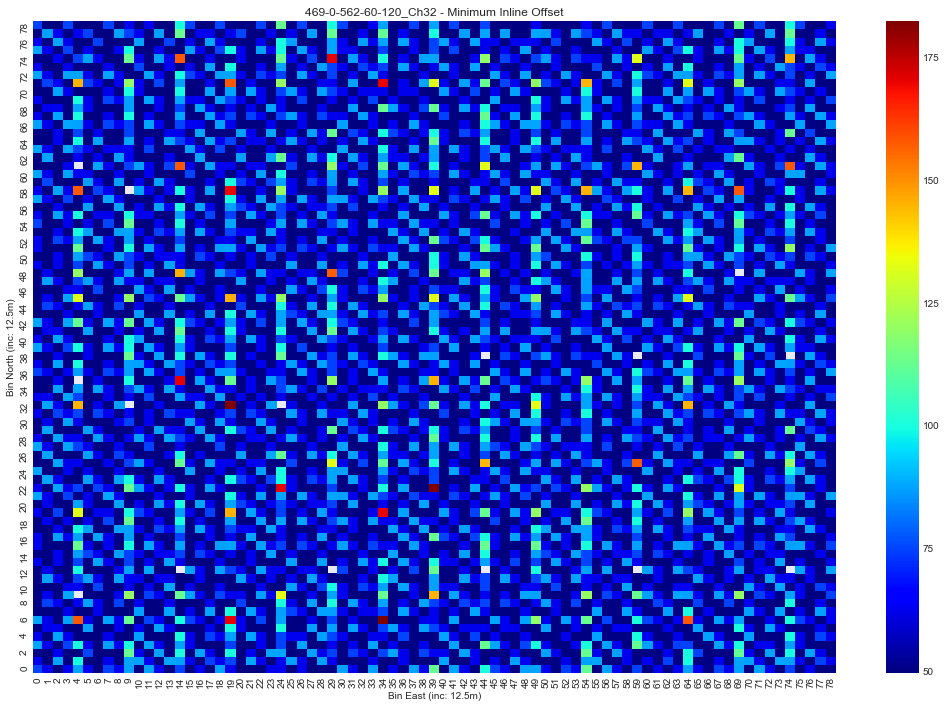

In [53]:
fold_plot(ret_mininloffs.statistic.T, file+' - Minimum Inline Offset', binsize_x, binsize_y, zeroisnan=False)

In [54]:
ret_maxxloffs = stats.binned_statistic_2d(df_filt['MidPtX'], df_filt['MidPtY'], abs(df_filt['OffsetX']), statistic='max', bins=[xx,yy])

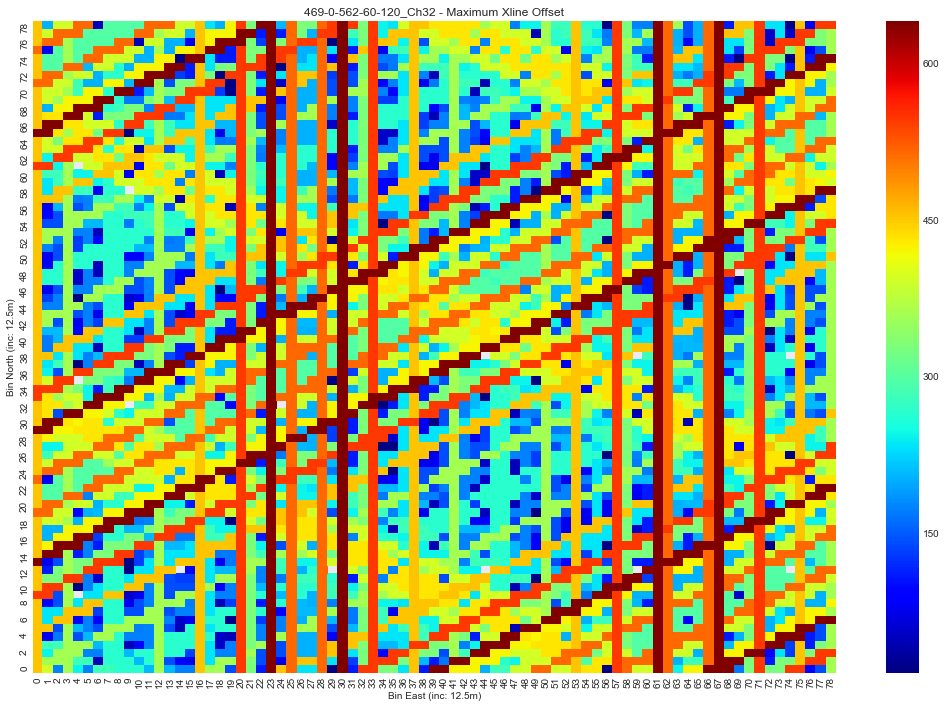

In [55]:
fold_plot(ret_maxxloffs.statistic.T, file+' - Maximum Xline Offset', binsize_x, binsize_y)

In [56]:
ret_minxloffs = stats.binned_statistic_2d(df_filt['MidPtX'], df_filt['MidPtY'], abs(df_filt['OffsetX']), statistic='min', bins=[xx,yy])

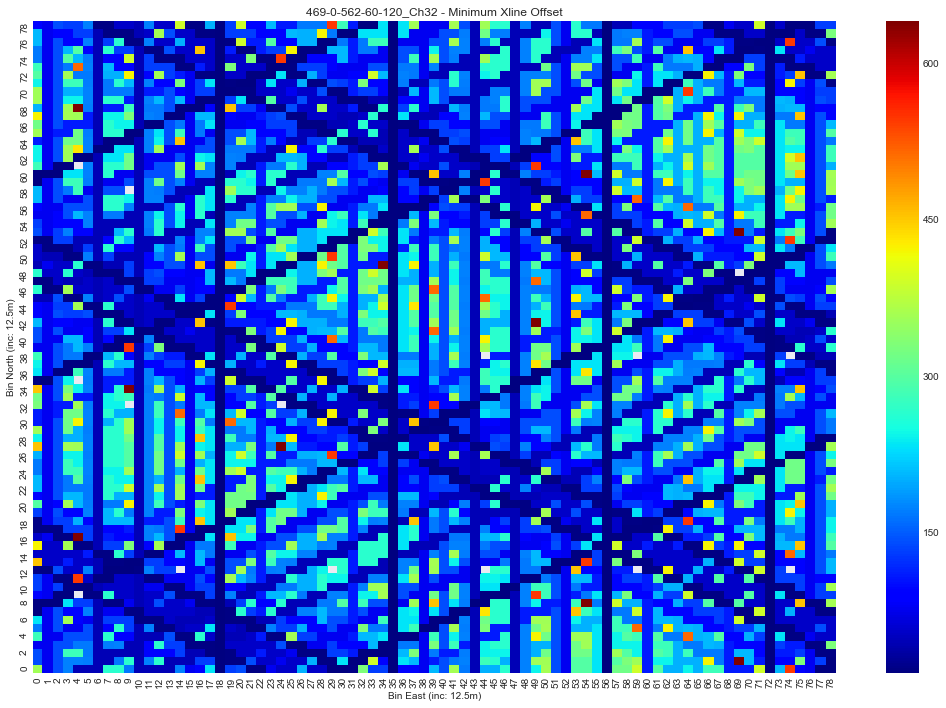

In [57]:
fold_plot(ret_minxloffs.statistic.T, file+' - Minimum Xline Offset', binsize_x, binsize_y, zeroisnan=False)

In [58]:
ret_inlineoffs_count = stats.binned_statistic_2d(df_filt['MidPtX'], df_filt['OffsetY'], None, statistic='count', bins=[xx,offset_bin])

In [59]:
def fold_plot_offset(data, title, incx, incy):
    data[data==0] = np.nan
    sns.set_style('dark')
    f, ax = plt.subplots(figsize=(18, 12))
    pal = sns.color_palette('Reds')
    x_ticks = np.linspace(0, 240, 7)
    
    #ax = sns.heatmap(data, cmap=pal, linewidths=0.1, cbar_kws={"ticks":x_ticks})
    ax = sns.heatmap(data, cmap=pal, vmin=0, vmax=240, linewidths=0.1, cbar_kws={"ticks":x_ticks})
    plt.xlabel('Bin East (inc: '+ str(incx)+'m)')
    plt.ylabel('Offset class (inc: ' + str(incy) + 'm)')
    plt.title(title);

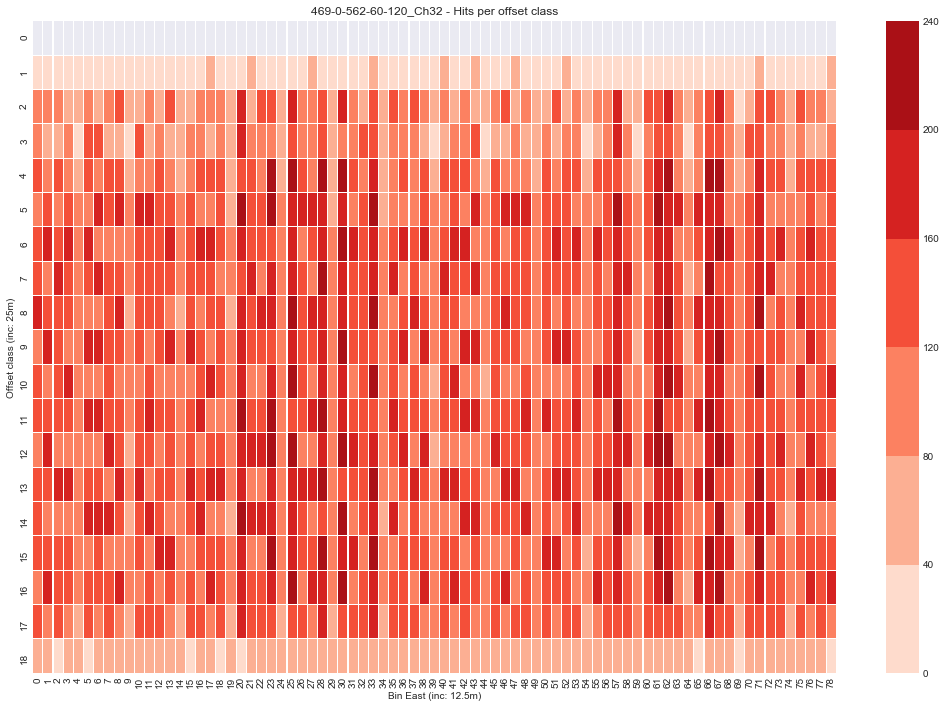

In [60]:
fold_plot_offset(ret_inlineoffs_count.statistic.T, file+' - Hits per offset class', binsize_x, offset_binsize)

In [61]:
stop

NameError: name 'stop' is not defined

In [ ]:
x = [0.1, 0.1, 0.1, 0.6]
y = [2.1, 2.6, 2.1, 2.1]
binx = [0.0, 0.5, 1.0, 1.5]
biny = [2.0, 2.5, 3.0]
ret = stats.binned_statistic_2d(x, y, None, 'count', bins=[binx,biny])

In [ ]:
fold_plot(ret.statistic.T)